# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Question 1) Is the distribution of body temperatures normal?
We will use ecdf with sample replicates of 10000.

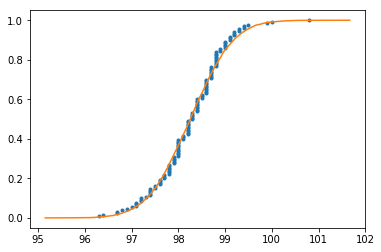

In [3]:
bins = int(np.sqrt(len(df)))
x = np.sort(df.temperature)
y = np.arange(1 , len(df)+1) / len(df)
plt.plot(x,y , marker='.' , linestyle='none')


mean = np.mean(df.temperature)
std = np.std(df.temperature)

samples = np.random.normal(mean , std , size=10000)
x1 = np.sort(samples)
y2 = np.arange(1 , len(samples)+1) / len(samples)
plt.plot(x1, y2)

It looks like normal distribution. 

Now we will have our basic functions ready for the rest of the inference statistics.

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x_val = np.sort(data)

    # y-data for the ECDF: y
    y_val = np.arange(1, n+1) / n

    return x_val, y_val

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

## Question 2)  Is the sample size large? Are the observations independent?

In [5]:
len(df)

130

As we can see that the data consists of 130 observations so we can conlucde that it is large enough. We can not say that the observations are independent or not. It could be the data coming from small group of people instead of unique observations.

## Question 3) Is the true population mean really 98.6 degrees F?

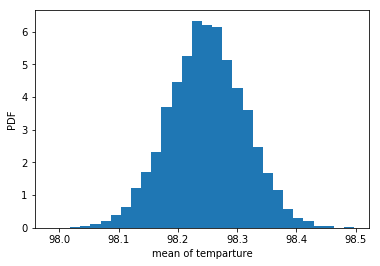

98.24923076923078


In [6]:
_ = plt.hist(draw_bs_reps(df['temperature'] , np.mean , 10000), bins=30, density=True)
_ = plt.xlabel('mean of temparture')
_ = plt.ylabel('PDF')
plt.show()
print (np.mean(df.temperature))

#####  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
We would use one-sample since there is only one group to test on.

## Method # 2 T-one test

In [7]:
stats.ttest_1samp(a= df.temperature,               # Sample data
                 popmean= 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [8]:
tscore = (np.mean(df['temperature']) - 98.6) / (np.std(df['temperature'])/np.sqrt(len(df)))
print("T score is " , tscore)
p = np.sum(np.mean(df['temperature']) <= 98.6) /130
print("P value is " , p)

T score is  -5.47592520208
P value is  0.00769230769231


In [9]:
samples = draw_bs_reps(df['temperature'],np.mean , 10000)
std_samples = np.std(samples)
zscore = (np.mean(std_samples) - 98.6) / (std_samples)/np.sqrt(10000)
print("Z-score is ", zscore)
p = np.sum(np.mean(std_samples) <= 98.6) /10000
print("P value is " , p)

Z-score is  -15.4085166363
P value is  0.0001


The proposed mean is 98.6 and according to this sample the mean is 98.2. We performed T-score and Z-score for hypothessis testing. In conclusion, the extreme value is 5.45 standrad deviation away from the mean and also P value is less then 0.05 , so we reject the null hypothesis.

## Question 4 Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [10]:
data_10 =  np.random.choice(df.temperature , 10)

In [21]:
tscore = (np.mean(data_10) - 98.6) / (np.std(data_10)/np.sqrt(len(data_10)))
print(tscore)
print("P value is 0.3944 according to T score table")

-2.36359336869
P value is 0.3944 according to T score table


In [12]:
samples = draw_bs_reps(data_10,np.mean , 10000)
std_samples = np.std(samples)
zscore = (np.mean(samples) - 98.6) / (std_samples)/np.sqrt(10000)
print(zscore)
print("Since the Z score is so low we can not find the P value.")

-0.0233055560065
Since the Z score is so low we can not find the P value.


The sample size is so low and we can only use t-test on this size of data. According to T-test we are not able to reject the null hypothessis. On the other hand, we cannot apply z-score on this small size of data. The dataset is too small to come to conclusion on hypothesis testing.

## Question 5) At what temperature should we consider someone's temperature to be "abnormal"?

In [13]:
std_error = np.std(df['temperature']) / np.sqrt(130)
print(std_error)
draw_bs = draw_bs_reps(df['temperature'], np.mean , size= 10000)
con_inter = np.percentile(draw_bs, ([2.5,97.5]))
print(con_inter)

0.0640566146952
[ 98.12615385  98.37307692]


The 95% of the data falls between 98.1 and 98.37. Anything above 98.37 or below 98.1 will be considered as "abnormal" according to this dataset.

## Question 6) Is there a significant difference between males and females in normal temperature?

In [14]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']

In [15]:
male.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [16]:
female.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [17]:
male_mean = np.mean(male['temperature'])
female_mean = np.mean(female['temperature'])
print(male_mean)
print(female_mean)

98.1046153846154
98.39384615384613


(array([  1.,   3.,   9.,  10.,  14.,  14.,   9.,   5.]),
 array([ 96.3,  96.7,  97.1,  97.5,  97.9,  98.3,  98.7,  99.1,  99.5]),
 <a list of 8 Patch objects>)

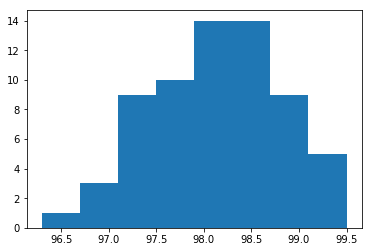

In [18]:
plt.hist(male['temperature'], bins = int(np.sqrt(len(male))))

(array([  3.,   3.,  14.,  16.,  22.,   4.,   2.,   1.]),
 array([  96.4 ,   96.95,   97.5 ,   98.05,   98.6 ,   99.15,   99.7 ,
         100.25,  100.8 ]),
 <a list of 8 Patch objects>)

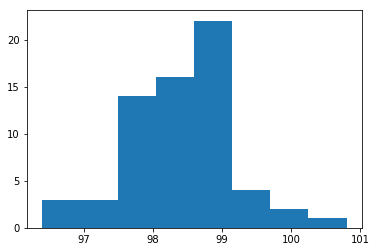

In [19]:
plt.hist(female['temperature'], bins = int(np.sqrt(len(female))))

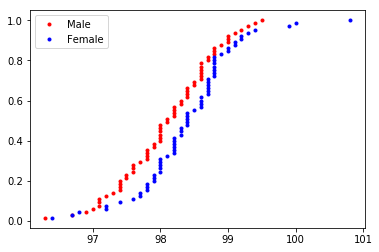

In [20]:
x = np.sort(male.temperature)
y = np.arange(1 , len(male)+1) / len(male)
plt.plot(x,y , marker='.' , linestyle='none', color='red')
x1 = np.sort(female.temperature)
y1 = np.arange(1 , len(female)+1) / len(female)
plt.plot(x1,y1 , marker='.' , linestyle='none',color='blue')
plt.legend(('Male','Female'))

As we can clearly see that females are more likely to have highter body temperature than males. 